# Intelligent Systems
# Exercise / Segmentation
### Working Group: Intelligent Systems
### Lecture: Prof. Dr.-Ing. habil.  Sven Tomforde
### Exercise: Ma. Sc. Simon Reichhuber (mail to: [Simon.Reichhuber@informatik.uni-kiel.de](mailto:Simon.Reichhuber@informatik.uni-kiel.de))

 
## Exercise 1 - Top-Down Segmentation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

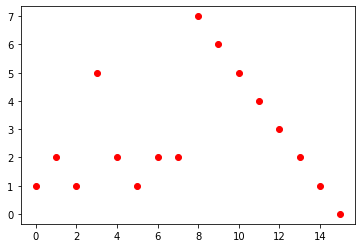

In [2]:
timeseries = [1,2,1,5,2,1,2,2,7,6,5,4,3,2,1,0]
parts = [] # Segmentation borders

plt.plot(timeseries, 'ro')
plt.show()

In [3]:
# Calculate approximation error (here with constant c)
def approx_error(timeseries):
    # c as mean
    c = 0
    c = np.mean(timeseries)
    
    approx_error = 0

    for item in timeseries: 
           approx_error = approx_error + np.abs(c - item)
        
    return approx_error


In [4]:
# Calculate approximation error (here with linear function)
# rounded off to the third decimal place.

def approx_error2(timeseries):
    if 1 == len(timeseries):
        return 0
    
    x = []
    for i in range(len(timeseries)):
        x.append(i)   
    y = timeseries

    # linear approximation
    mc = np.polyfit(x,y,1)
    m = np.round(mc[0], 3)
    c = np.round(mc[1], 3)
    
    # Calculate error
    approx_error = 0
    for i in range(len(timeseries)):
        geraden_punkt = m*i+c
        error = np.abs(geraden_punkt - timeseries[i] )
        approx_error = approx_error + error
        
    approx_error = np.round(approx_error, 3)
    
    return approx_error

In [5]:
# TEST
print(approx_error(timeseries))
print(approx_error2(timeseries))

27.0
26.632


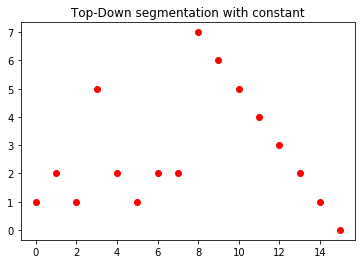

In [6]:
plt.plot(timeseries, 'ro')
for i in parts:
    # don't visualise last segmentation
    if i < len(timeseries):
        plt.axvline(i-0.5, color='black')
plt.title("Top-Down segmentation with constant")
plt.show()

In [8]:
# Find optimal separation
# Here: Top-Down with Polynom of degree 1 
parts=[]
timeseries = [1,2,1,5,2,1,2,2,7,6,5,4,3,2,1,0]

def topDown(timeseries, offset):
    best_error = math.inf
    partition = 0
    
    for i in range(len(timeseries)):
        if i > 0:
            error_left = (approx_error2(timeseries[:i]))
            error_right = (approx_error2(timeseries[i:]))
            
            if best_error > error_left + error_right:
                best_error = error_left + error_right
                partition = i
    
    parts.append(partition + offset)
    parts.sort()
    
    error_left = (approx_error2(timeseries[:partition]))
    error_right = (approx_error2(timeseries[partition:]))
    
    if error_left > 1:
        topDown(timeseries[:partition], offset)
    if error_right > 1:
       topDown(timeseries[partition:], partition + offset)

In [9]:
topDown(timeseries, 0)

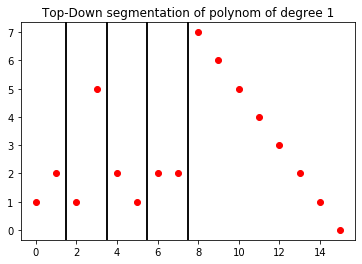

In [10]:
plt.plot(timeseries, 'ro')
for i in parts:
    # don't visualise last segmentation
    if i < len(timeseries):
        plt.axvline(i-0.5, color='black')
plt.title("Top-Down segmentation of polynom of degree 1")
plt.show()

## Aufgabe 2 - Bottom-Up Segmentierung

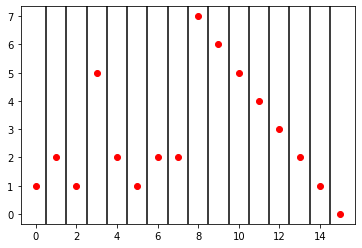

In [10]:
timeseries = [1,2,1,5,2,1,2,2,7,6,5,4,3,2,1,0]

plt.plot(timeseries, 'ro')
for i in range(len(timeseries)-1):
    plt.axvline(i+0.5, color='black')

plt.show()

In [12]:
parts = []

# Bottom-Up approach with constant
def bottumUp(timeseries, start):
    # add new start segment
    temp = []
    temp.append(timeseries[start])
    bool = True
    
    # if start is last element --> add it to parts
    if start == len(timeseries)-1:
        parts.append(start+1)
    # otherwise add 1 as long as approximation error is above 1
    while bool:
        start = start + 1
        # if start is not the last element add another element
        if start < len(timeseries):
            temp.append(timeseries[start])
            # check if error is above 1
            if approx_error(temp) > 1:
                # if yes, remove last element and call function recursively
                del temp[len(temp)-1]
                parts.append(start)
                bottumUp(timeseries, start)
                bool = False
        else:
            parts.append(start)
            bool = False

In [19]:
bottumUp(timeseries, 0)

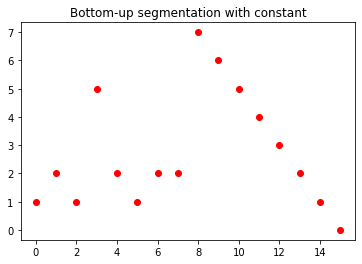

In [13]:
plt.plot(timeseries, 'ro')
for i in parts:
    # don't visualise the last segment
    if i < len(timeseries):
        plt.axvline(i-0.5, color='black')
plt.title("Bottom-up segmentation with constant")
plt.show()

In [22]:
parts = []
# Bottom-Up approach with polynom of degree 1

def bottumUp2(timeseries, start):
    # add new start segment
    temp = []
    temp.append(timeseries[start])
    bool = True
    
    # if start is last element --> add it to parts
    if start == len(timeseries)-1:
        parts.append(start+1)
    # otherwise add 1 as long as approximation error is above 1
    while bool:
        start = start + 1
        # if start is not the last element add another element
        if start < len(timeseries):
            temp.append(timeseries[start])
            # check if error is above 1
            if approx_error2(temp) > 1:
                # if yes, remove last element and call function recursively
                del temp[len(temp)-1]
                parts.append(start)
                bottumUp2(timeseries, start)
                bool = False
        else:
            parts.append(start)
            bool = False

In [23]:
bottumUp2(timeseries, 0)

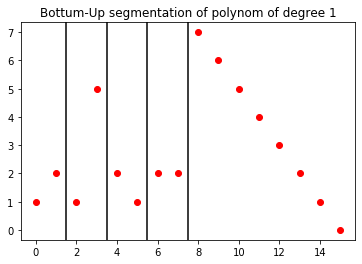

In [24]:
plt.plot(timeseries, 'ro')
for i in parts:
    # die letzte Aufteilung nicht mehr zeichnen 
    if i < len(timeseries):
        plt.axvline(i-0.5, color='black')
plt.title("Bottum-Up segmentation of polynom of degree 1")
plt.show()